# Assignment 3

# Task 1 - Train and Evaluate a KNN Classifier on the Connect-4 Dataset

## 1.1 - Import the necessary libraries

In [57]:
# Importing the libraries

# YOUR CODE HERE

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


## 1.2 - Load and pre-process the dataset

In [4]:
data_path = './Data/connect-4.data.txt'

column_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 
                'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
                'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
                'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
                'e1', 'e2', 'e3', 'e4', 'e5', 'e6',
                'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
                'g1', 'g2', 'g3', 'g4', 'g5', 'g6',
                'class']

# Load the data into a pandas dataframe using the column names defined above
# YOUR CODE HERE
df = pd.read_csv(data_path, names=column_names)


In [5]:
# Print the shape of the dataframe
# YOUR CODE HERE
print(df.shape)

# Show the first 5 rows of the dataframe
# YOUR CODE HERE
print(df.head(5))

(67557, 43)
  a1 a2 a3 a4 a5 a6 b1 b2 b3 b4  ... f4 f5 f6 g1 g2 g3 g4 g5 g6 class
0  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
1  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
2  b  b  b  b  b  b  o  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
3  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
4  o  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win

[5 rows x 43 columns]


In [7]:
# Check for null entries
# YOUR CODE HERE
errors = df.isnull().values.sum()
print(errors)


0


In [8]:
# Check for missing values
# I included the first line of code to see all of the missing values in the plot
# YOUR CODE HERE
print(df.isna())
df.isna().values.any()


          a1     a2     a3     a4     a5     a6     b1     b2     b3     b4  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
67552  False  False  False  False  False  False  False  False  False  False   
67553  False  False  False  False  False  False  False  False  False  False   
67554  False  False  False  False  False  False  False  False  False  False   
67555  False  False  False  False  False  False  False  False  False  False   
67556  False  False  False  False  False  False  False  False  False  False   

       ...     f4     f5     f6     g1     g2     g

False

### Convert the class labels to numerical values
Use the `map` function to convert the class labels to numerical values, similar to what we did in the Iris dataset.

In [9]:
# Converting the class labels to numerical values

label_dict = {
    'win':0,
    'loss':1,
    'draw':2 
    }

# YOUR CODE HERE
df['class']=df['class'].replace(label_dict)
print(df.head(5))

  a1 a2 a3 a4 a5 a6 b1 b2 b3 b4  ... f4 f5 f6 g1 g2 g3 g4 g5 g6 class
0  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b     0
1  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b     0
2  b  b  b  b  b  b  o  b  b  b  ...  b  b  b  b  b  b  b  b  b     0
3  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b     0
4  o  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b     0

[5 rows x 43 columns]


<Axes: ylabel='Frequency'>

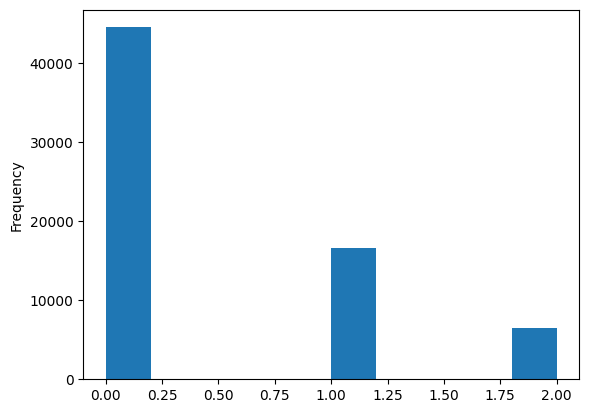

In [10]:
# Show a histogram of the class labels. Use the 'class' column for this. 

# YOUR CODE HERE
df['class'].plot(kind='hist')

### Convert the attributes to numerical values

Use the `applymap` function and a `lambda` function to convert the attributes to numerical values.

In [11]:
# attribute map
attribute_dict = {
    'x':0,
    'o':1,
    'b':2,
    0:0, 1:1, 2:2
    }

# YOUR CODE HERE
df = df.applymap(attribute_dict.get)
print (df)

       a1  a2  a3  a4  a5  a6  b1  b2  b3  b4  ...  f4  f5  f6  g1  g2  g3  \
0       2   2   2   2   2   2   2   2   2   2  ...   2   2   2   2   2   2   
1       2   2   2   2   2   2   2   2   2   2  ...   2   2   2   2   2   2   
2       2   2   2   2   2   2   1   2   2   2  ...   2   2   2   2   2   2   
3       2   2   2   2   2   2   2   2   2   2  ...   2   2   2   2   2   2   
4       1   2   2   2   2   2   2   2   2   2  ...   2   2   2   2   2   2   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
67552   0   0   2   2   2   2   1   0   1   2  ...   2   2   2   1   1   0   
67553   0   0   2   2   2   2   1   2   2   2  ...   2   2   2   1   0   1   
67554   0   0   2   2   2   2   1   1   2   2  ...   2   2   2   1   0   0   
67555   0   1   2   2   2   2   1   2   2   2  ...   2   2   2   1   0   1   
67556   0   1   1   1   0   2   1   2   2   2  ...   2   2   2   0   2   2   

       g4  g5  g6  class  
0       2   2   2      0  
1       2

## 1.3 - Split the dataset into training and testing sets

In [39]:
# Assign the features to a numpy matrix called X and the class labels to a numpy vector called y

# YOUR CODE HERE
X = df.drop('class', axis=1).values
y = df['class'].values


In [40]:
# Split the data into training and test sets. Use 30% of the data for testing and a random state of 42
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

In [41]:
# Print the shapes of the training and test sets

# YOUR CODE HERE
print(f'Xtrain shape: {X_train.shape}')
print(f'ytrain shape: {y_train.shape}')
print(f'testx shape: {X_test.shape}')
print(f'testy shape: {y_test.shape}')


Xtrain shape: (47289, 42)
ytrain shape: (47289,)
testx shape: (20268, 42)
testy shape: (20268,)


## 1.4 - Train and evaluate a kNN classifier

Train a kNN classifier using the training set and predict the labels of the test set. Use k=1. Report the accuracy of the classifier.

**Note:** As a distance metric, use the **Hamming** distance metric. Refer to the documentation of the `sklearn.neighbors.KNeighborsClassifier` class. The metric can be specified using the `metric` parameter of the `KNeighborsClassifier`, as `metric='hamming'`.


In [42]:
# Fit the KNN model to the training data

# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors = 1, metric='hamming')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='hamming', n_neighbors=1)

In [43]:
# Evaluate the model on the test data using classification accuracy and report the results.
# Note, this may take some time to run. It takes about 30 seconds on my machine.0.9338365896980462

accuracy = knn.score(X_test, y_test)
print (accuracy)
# YOUR CODE HERE

0.661880797315966


# Task 2 - Fine tune the hyperparameter k of a kNN classifier

### Split the data into training, validation and test sets, using a 60:20:20 split

In [48]:
# Split the data into training, validation and test sets. Use a 60:20:20 split. Use a random state of 42.

# YOUR CODE HERE
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)


Print the shape of the training, validation and test sets. Check the numbers to make sure that the split is correct.

In [ ]:
# Print the shapes of the training, validation and test sets

# YOUR CODE HERE
print("Training set shape: ", X_train.shape, y_train.shape)
print("Validation set shape: ", X_val.shape, y_val.shape)
print("Test set shape: ",  X_test.shape, y_test.shape)





### Tune the value of k using the validation set

Tune the value of k using the validation set for values from 1 to 30. Use the Hamming distance metric. Report the accuracy of the classifier on the validation set for each value of k. Plot the accuracy of the classifier on the validation set for each value of k. Report the value of k that gives the best accuracy on the validation set.

In [ ]:
# YOUR CODE HERE
k_values = range(1,31)
val_accuracies=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='hamming')
    knn.fit(X_train, y_train)
    y_val_pred=knn.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)
    print("k=%d, validation accuracy = %.4f"%(k, val_acc))
    
plt.plot(k_values, val_accuracies)
plt.title("ValAccur vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show
best_k = k_values[np.argmax(val_accuracies)]
print("Best k val : ", best_k)


#this took my computer about 20 min to run 


### Evaluate the classifier on the test set

Train a kNN classifier using the training set and predict the labels of the test set. Use the value of k that gave the best accuracy on the validation set. Report the accuracy of the classifier on the test set.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, metric='hamming')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy = (y_pred == y_test).mean()
print('Accuracy on test set: ', accuracy)